In [4]:
import django
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from twitter.models import *
import parliament.models as pms
import scoping.models as sms

from django.db.models import Sum, Count
from django.db.models.fields import DateField
from django.db.models.functions import Cast
import textwrap as tw
import datetime
p = sms.Project.objects.get(pk=134)

In [2]:
# Todays tweets 
midnight = django.utils.timezone.make_aware(datetime.datetime.now().replace(hour=0,minute=0)) #- timedelta(days=5)
tweets = Status.objects.filter(created_at__gt=midnight)
print(f"{tweets.count()} tweets from today")

tweets.values('searches__string').annotate(
    n = Count('pk')
)

0 tweets from today


<QuerySet []>

In [3]:
ustats = Status.objects.values('author__screen_name').annotate(
    n = Count('pk')
)

ustats.order_by('-n')

<QuerySet [{'author__screen_name': None, 'n': 59681}, {'author__screen_name': 'EskenSaskia', 'n': 18833}, {'author__screen_name': 'coal_perhaps', 'n': 15056}, {'author__screen_name': 'RenateKuenast', 'n': 13513}, {'author__screen_name': 'kahrs', 'n': 10584}, {'author__screen_name': 'MiRo_SPD', 'n': 9897}, {'author__screen_name': 'StBrandner', 'n': 8618}, {'author__screen_name': 'berlinliebich', 'n': 8495}, {'author__screen_name': 'UdoHemmelgarn', 'n': 7479}, {'author__screen_name': 'BriHasselmann', 'n': 6548}, {'author__screen_name': 'Frank_Pasemann', 'n': 6076}, {'author__screen_name': 'GruenClaudia', 'n': 5899}, {'author__screen_name': 'nicolabeerfdp', 'n': 5604}, {'author__screen_name': 'PetrBystronAfD', 'n': 5593}, {'author__screen_name': 'Nicole_Hoechst', 'n': 5400}, {'author__screen_name': 'Schneider_AfD', 'n': 5304}, {'author__screen_name': 'coal_sora', 'n': 5122}, {'author__screen_name': '3T_Profit_0_Co2', 'n': 4798}, {'author__screen_name': 'OlliLuksic', 'n': 4741}, {'author__

In [4]:
Status.objects.filter(author__screen_name="EskenSaskia")

# Compare API tweets with scraped tweets
# build interface

<QuerySet [<Status: Status object (844580240227782656)>, <Status: Status object (708331773483229188)>, <Status: Status object (881261595392962562)>, <Status: Status object (881155952141053952)>, <Status: Status object (823830661802950657)>, <Status: Status object (708330412800675840)>, <Status: Status object (701155351446556672)>, <Status: Status object (634819816684187649)>, <Status: Status object (554355750924222464)>, <Status: Status object (516823763623870464)>, <Status: Status object (840521551095222274)>, <Status: Status object (920560622386991104)>, <Status: Status object (915565591997636609)>, <Status: Status object (905131007149580290)>, <Status: Status object (880074229009592321)>, <Status: Status object (880073502933606401)>, <Status: Status object (880072913411604480)>, <Status: Status object (880014916593360898)>, <Status: Status object (879436600261971969)>, <Status: Status object (865495801853747200)>, '...(remaining elements truncated)...']>

In [5]:
stats = Status.objects.annotate(
    rts = Count('retweeted_by__id')
).order_by('-rts')
stats.values('rts','text','author__screen_name')

<QuerySet [{'text': 'Claudia Roth hat in den letzten Tagen tausende Hassnachrichten von Rechten bekommen. \n\nJetzt anwortet sie mit persönlichen Erklärung. Und mit #LiebeStattHass. https://t.co/jsqExqPcjQ https://t.co/F2JBvsDLSQ', 'author__screen_name': 'GrueneBundestag', 'rts': 22}, {'text': '1⃣5⃣.0⃣0⃣0⃣ Follower - herzlichen Dank für Ihr reges Interesse an unserer Arbeit als Oppositionsführer im… https://t.co/QtGRqs8MKg', 'author__screen_name': 'AfDimBundestag', 'rts': 17}, {'text': '1,7 Milliarden #Überstunden vernichteten im Jahr 2016 eine Million Vollzeitstellen in Deutschland. Die Folge: Gesundheit, Familie und Privatleben bleiben auf der Strecke. Deshalb: Zeitsouveränität in die Hand der Beschäftigten! Es ist 1.MAIne Zeit! #TagderArbeit #1Mai https://t.co/Xk54H9uG7B', 'author__screen_name': 'Linksfraktion', 'rts': 16}, {'text': 'Die Tarn -Maske der Höcke-Gauland -Weidel AfD ist nach Chemnitz endgültig gefallen! Es sind Rechtsradikale , die sich mit Nazis mehr und mehr vermengen

In [6]:
all_users = User.objects.all().count()
monitoring_users = User.objects.filter(monitoring=True).count()
status_count = Status.objects.all().count()
print("{} statuses by {} users in database monitoring {} accounts".format(status_count, all_users, monitoring_users))

4614070 statuses by 1050613 users in database monitoring 690 accounts


In [7]:
Status.objects.filter(api_got=True).count()

4324530

In [8]:
kk = TwitterSearch.objects.get(string="kohle")
print(f'{kk.status_set.all().count():,} tweets for search: {kk.string}')

midnight = django.utils.timezone.make_aware(datetime.datetime.now().replace(hour=0,minute=0)) 

bimonth = midnight - timedelta(days=360)

byday = kk.status_set.filter(created_at__gt=bimonth).annotate(
    date_only=Cast('created_at', DateField())
).values('date_only').annotate(
    n = Count('pk')
).order_by('date_only')



176,744 tweets for search: kohle


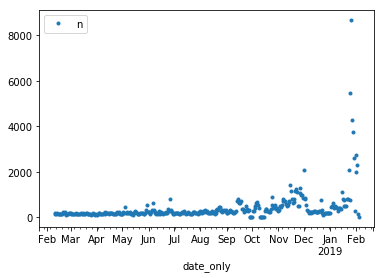

In [9]:
df = pd.DataFrame.from_dict(list(byday))

df.head()

df['date_only'] = pd.to_datetime(df['date_only'])

df.plot('date_only','n', style=".")

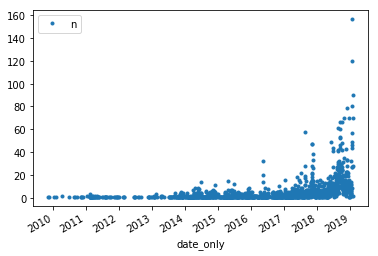

In [10]:
pp_coal = Status.objects.filter(author__monitoring=True,text__icontains="Kohle").annotate(
    date_only=Cast('created_at', DateField())
).values('date_only').annotate(
    n = Count('pk')
).order_by('date_only')

df = pd.DataFrame.from_dict(list(pp_coal))

df.head()

df['date_only'] = pd.to_datetime(df['date_only'])

df.plot('date_only','n', style=".")


In [58]:
for t in kk.status_set.filter(author__monitoring=True)[:10]:
    print(t.text)
    print(t.author.screen_name)
    print()

#ZDF #Zoom mit Report über Irsinn von Kohle-Import nach Deutschland. Etwas spät. Für deutschen Bergbau ist der Zug 2018 abgefahren. #kohle
KaczmarekOliver

RT @j_uekermann: Rückt die Kohle raus – BAföG-Reform muss kommen! - http://t.co/yGWLGQwAS9
KaczmarekOliver

#Kohlekommission tagt heute. In der entscheidenden Sitzung wird über unsere Zukunft entschIeden! Denkt an die Gener… https://t.co/fdUhoDfu4P
HildeMattheis

Heute Kohlekraftwerk in Bergkamen besucht. Wäre gut, wenn alle, die darüber sprechen, mal eins von innen sehen.
KaczmarekOliver

#endegelaende #dielinke für systemwandel, gegen klimawandel: Kohle stoppen! mit dem roten Finger https://t.co/0d44dAJ38D
SabineLeidig

Größte Blockade: Internationale KlimaaktivistInnen besetzen zu Tausenden Kohlegrube. https://t.co/RohpODe1uE #endcoal #endegelaende
SabineLeidig

ROTE LINIE GEGEN KOHLE. Klima schützen. Kohle stoppen. Demo am 04.11.17 gg. UN-#Klimakonferenz in #Bonn… https://t.co/0KhEtn7X5Z
SabineLeidig

RT @Linksfraktion: Auf dem 

In [59]:
for t in kk.status_set.values('text')[:10]:
    print(t)
    print()

{'text': 'Possini Kohle Ball Swing Arm Plug-In Wall Lamp only $99.95 https://t.co/dKCOP5xX8s'}

{'text': 'was soll denn pofalla da? ist die deutsch bahn an den fliessbändern beteiligt, mit denen abraum und kohle von den b… https://t.co/CIqSU7la1A'}

{'text': '@zufallszahl @jensurban1 Sagen wir mal so: Kohle kostet bereits im Normalbetrieb sehr viel mehr Menschenleben als K… https://t.co/AR9dXE1sLj'}

{'text': '@SonnykissJay @PowerSpiky Jared hat genug Kohle. 😂 Echt ein Autogramm Tattoo ? Cool.'}

{'text': 'Lilly trennt sich von Boris?  Scheisse wenn man keine Kohle mehr hat.....'}

{'text': 'Grill Outdoorchef Easy Charcoal 480 - Kugelgrill Kohle - NEU https://t.co/wd3tfsBVzp'}

{'text': '@ShannonLetoGER @PowerSpiky Mit Sicherheit haben sie es nicht so nötig,aber Kohle bleibt Kohle,nä😉😂'}

{'text': 'Überall noch Kohle @BravaQuattro #bravaquattro #lbms #leberwurstbrotmitsenf @ChristinaNonis https://t.co/u1qbGhxlGT'}

{'text': 'Deutschland darf seine Klimaschutzziele nicht aufgeben, muss 

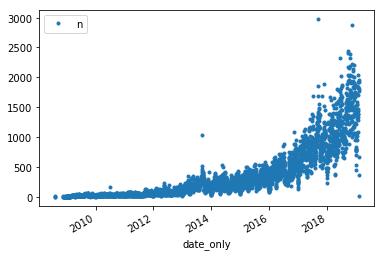

In [60]:
byday = Status.objects.filter(author__monitoring=True).annotate(
    date_only=Cast('created_at', DateField())
).values('date_only').annotate(
    n = Count('pk')
).order_by('date_only')

df = pd.DataFrame.from_dict(list(byday))

df.head()

df['date_only'] = pd.to_datetime(df['date_only'])

df.plot('date_only','n', style=".")

In [7]:
Status.objects.filter(text__icontains="…").count()

1128525

In [5]:
Through = Status.searches.through
reassign=True
if reassign:
    for ts in TwitterSearch.objects.filter(project=p):
        print(ts.string)
        print(ts.status_set.count())
        #ts.status_set.clear()
        tweets = Status.objects.filter(text__icontains=ts.string).exclude(searches=ts)
        #tts = [Through(status=t,twittersearch=ts) for t in tweets]
        #Through.objects.bulk_create(tts)
        print(tweets.count())
    

coal
220217
1622139
@badulrichmartha
1231
94
kohle
182607
38321
Kohlekommission
32455
5060


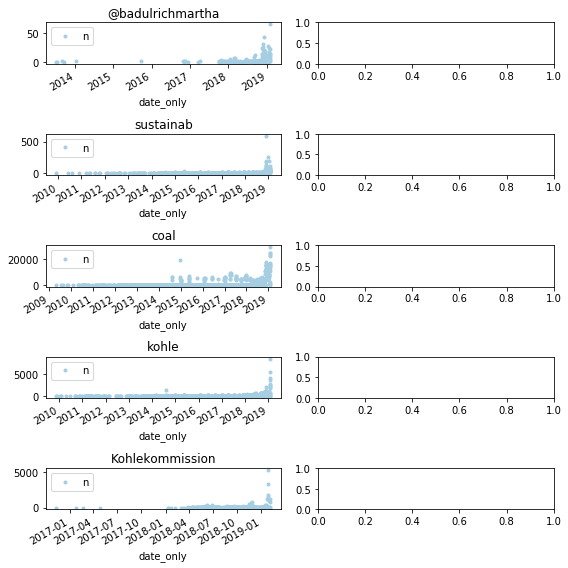

In [62]:
plt.close()
fig = plt.figure(figsize=(12,12))

searches = TwitterSearch.objects.all()

fig, axs = plt.subplots(searches.count(),2,figsize=(8,8))

for i, ts in enumerate(TwitterSearch.objects.all()):
    byday = ts.status_set.all().annotate(
        date_only=Cast('created_at', DateField())
    ).values('date_only').annotate(
        n = Count('pk')
    ).order_by('date_only')

    df = pd.DataFrame.from_dict(list(byday))
    df['date_only'] = pd.to_datetime(df['date_only'])

    #if i > 1:
    #    ax = fig.add_subplot(1,2,i+1,sharex=ax)
    #else:
    #    ax = fig.add_subplot(1,2,i+1)
    #
    
    ax = axs[i,0]
    ax.set_title(ts.string)
    
    df.plot('date_only','n', style=".",colormap='Paired', ax = ax)

    continue 
    
    # This way of counting up hashtags is way too slow
    hts = []
    for s in ts.status_set.filter(entities__hashtags__iregex='\w'):
        for hashtag in s.entities['hashtags']:
            try:
                ht = [x for x in hts if x['text']==hashtag['text']][0]
                ht['count']+=1
            except:
                ht = {"text": hashtag["text"], "count": 1}
                hts.append(ht) 
    
    #print(ht_df.sort_values('count',ascending=False).head(20))
    ax = axs[i,1]
    ht_df = df.from_dict(hts)
    ht_df = ht_df.sort_values('count',ascending=False).head(10)
    ht_df.plot.bar('text','count',colormap='Paired',ax = ax)
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels,rotation=40,ha="right")
    
fig.tight_layout()
plt.show()

In [15]:
ax.get_xticklabels()

<a list of 6 Text xticklabel objects>

In [ ]:
plt.close()
fig = plt.figure(figsize=(18,24))

searches = TwitterSearch.objects.all()

parties = pms.Party.objects.filter(name__in=['cducsu','spd','linke','fdp','afd','gruene'])

fig, axs = plt.subplots(4,parties.count(),figsize=(18,12), sharey='row')

for i, party in enumerate(parties):
    
    users = User.objects.filter(person__party=party)
    
    statuses = Status.objects.filter(
        author__person__party=party
    )
    print(party)
    byday = statuses.annotate(
        date_only=Cast('created_at', DateField())
    ).values('date_only').annotate(
        n = Count('pk'),
        rts = Sum('retweets_count')
    ).order_by('date_only')

    df = pd.DataFrame.from_dict(list(byday))
    df['date_only'] = pd.to_datetime(df['date_only'])
    
    ax = axs[0,i]
    ax.set_title(f"{party.name} - {users.count()} tweeters")
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    
    df.plot('date_only','n', style=".",colormap='Paired', ax = ax)
    
    ax = axs[1,i]
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    
    df.plot('date_only','rts', style=".",colormap='Paired', ax = ax)

    hts = []
    for s in statuses.filter(entities__hashtags__iregex='\w'):
        for hashtag in s.entities['hashtags']:
            try:
                ht = [x for x in hts if x['text']==hashtag['text']][0]
                ht['count']+=1
            except:
                ht = {"text": hashtag["text"], "count": 1}
                hts.append(ht) 
    
    #print(ht_df.sort_values('count',ascending=False).head(20))
    ax = axs[2,i]
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    ht_df = df.from_dict(hts)
    ht_df = ht_df.sort_values('count',ascending=False).head(10)
    ht_df.plot.bar('text','count',colormap='Paired',ax = ax)
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels,rotation=40,ha="right")
    ax.set_title(f"{party.name} - most used hashtags")
    
    most_retweeted = statuses.order_by('-retweets_count').first()
    ax = axs[3,i]
    ax.text(
        0.5,
        0.9,
        tw.fill(tw.dedent(most_retweeted.author.person.__str__()),width=40),
        ha="center",
        va="top"
    )
    ax.text(
        0.5,
        0.75,
        tw.fill(tw.dedent(f"retweeted {most_retweeted.retweets_count} times"),width=40),
        ha="center",
        va="top"
    )
    ax.text(
        0.5,
        0.6,
        tw.fill(tw.dedent(most_retweeted.text),width=40),
        ha="center",
        va="top"
    )
    ax.grid(False)
    ax.axis('off')
    
    
fig.tight_layout()
plt.show()

CDUCSU
SPD
LINKE


In [ ]:
parties = pms.Party.objects.filter(name__in=['cducsu','spd','linke','fdp','afd','gruene'])
party = parties.first()
statuses = Status.objects.filter(
    author__person__party=party,
    entities__hashtags__iregex='\w'
)[:1000]

ss = statuses.annotate(
    
)

hts = statuses.values('entities__hashtags__text').annotate(
    n = Count('pk')
)

#hts


In [ ]:
hts

In [ ]:
hts = []
for s in statuses.filter(entities__hashtags__iregex='\w'):
    for hashtag in s.entities['hashtags']:
        try:
            ht = [x for x in hts if x['text']==hashtag['text']][0]
            ht['count']+=1
        except:
            ht = {"text": hashtag["text"], "count": 1}
            hts.append(ht) 